In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ADA

In [2]:

df = pd.read_csv('/Users/marinelafargue/Desktop/projet calorie/data/df_encode_complete_OK.csv')

In [3]:
df.head(2)

,Unnamed: 0,age,height,weight,duration,heart_rate,body_temp,calorie,female,male,Height_meters,calculated_IMC
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1,1.90,26.038781
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0,1.66,21.773842


In [4]:
# Define the X (input) and y (target) features
X = df.drop(["calorie","Unnamed: 0", "weight","female","male", "height", "duration" ,"Height_meters"], axis=1)
y = df["calorie"]

In [5]:
test_size = 0.33
seed = 300
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [6]:
X_train.head(2)

,age,heart_rate,body_temp,calculated_IMC
646,32,110.0,40.9,24.989588
11946,35,97.0,39.6,23.306680


In [7]:
ada_reg = AdaBoostRegressor(n_estimators=100)
ada_reg
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 

AdaBoostRegressor(n_estimators=100)

In [8]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [9]:
# verif avec cross val

scores = cross_val_score(ada_reg, X_train, y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

Mean cross-validataion score: 0.89


In [10]:
# verif avec K fold

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.89


In [11]:
# prediction avec mse

ypred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

MSE: 470.41


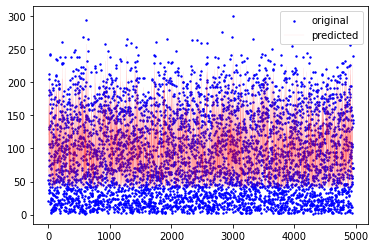

In [23]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=2, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.05, color="red", label="predicted")
plt.legend()
plt.show()

In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

rng = np.random.RandomState(1)

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [28]:
regr_1.score(X_test, y_test)

0.8886546473997319

In [29]:
regr_2.score(X_test, y_test)

0.8983573496741115